<a href="https://colab.research.google.com/github/kmkar31/Keras-inbuilt-Datasets/blob/master/IMDB_Sentiment_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Sentiment Classification with Keras

In [1]:
import keras
import numpy as np

Using TensorFlow backend.


### Import and Load the Data

In [0]:
from keras.datasets import imdb

In [3]:
(Xtrain , Ytrain) , (Xtest , Ytest) = imdb.load_data(path='imdb.npz', maxlen=10000, seed=113, oov_char=0 , num_words = 20000)

17465344/17464789 [==============================] - 1s 0us/step


### Pad the text . The additional length is padded with a zero

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
def pad(sequence):
  return pad_sequences(sequence, maxlen=200, dtype='int32')

In [0]:
X_train = pad(Xtrain)
X_test = pad(Xtest)

### Perform a sort of one_hot encoding on the data restriction the vocabulary size to 20000 words

In [0]:
def Vectorize(sequence):
  temp = np.zeros((len(sequence) , 20000))
  for i , sequence in enumerate(sequence):
    temp[i , sequence] = 1
  return temp

In [0]:
X_train = Vectorize(X_train)
X_test = Vectorize(X_test)

### One_hot encode the labels

In [0]:
Y_train = keras.utils.to_categorical(Ytrain , num_classes = 2)

In [10]:
Y_train.shape

(25000, 2)

### Define the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

In [12]:
model = Sequential()

model.add(Dense(256 , activation = 'relu' , kernel_initializer = 'glorot_uniform' , input_shape = (20000,)))
model.add(Dense(2 , activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               5120256   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 5,120,770
Trainable params: 5,120,770
Non-trainable params: 0
_________________________________________________________________


### Compile and Train the model

In [0]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [14]:
history = model.fit(X_train[2000:] , Y_train[2000:] , validation_data = (X_train[:2000] , Y_train[:2000]) ,shuffle = True , batch_size = 50 , epochs = 5 , verbose = 1 )

Train on 23000 samples, validate on 2000 samples
Epoch 1/5
23000/23000 [==============================] - 33s 1ms/step - loss: 0.3283 - accuracy: 0.8589 - val_loss: 0.2748 - val_accuracy: 0.8840
Epoch 2/5
23000/23000 [==============================] - 32s 1ms/step - loss: 0.1218 - accuracy: 0.9535 - val_loss: 0.3307 - val_accuracy: 0.8770
Epoch 3/5
23000/23000 [==============================] - 32s 1ms/step - loss: 0.0365 - accuracy: 0.9878 - val_loss: 0.4691 - val_accuracy: 0.8670
Epoch 4/5
23000/23000 [==============================] - 32s 1ms/step - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.5755 - val_accuracy: 0.8770
Epoch 5/5
23000/23000 [==============================] - 32s 1ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.6873 - val_accuracy: 0.8765


### Plot the Accuracies and Losses on training and Validation Data

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

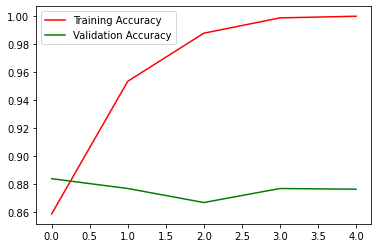

In [16]:
plt.plot(history.history['accuracy'] ,color = 'red' ,label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'] ,color = 'green' , label = 'Validation Accuracy')
plt.legend()
plt.show()

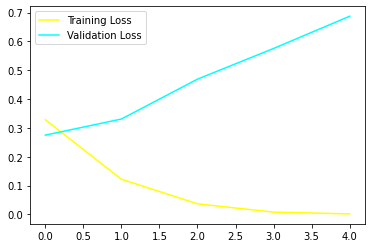

In [17]:
plt.plot(history.history['loss'] ,color = 'yellow' ,label = 'Training Loss')
plt.plot(history.history['val_loss'] ,color = 'cyan' , label = 'Validation Loss')
plt.legend()
plt.show()

### Predict the labels for the Testing data and print Testing Accuracy

In [0]:
Y_predict = model.predict(X_test , batch_size = 20)

In [19]:
print(Y_predict)

[[9.9870133e-01 1.2987013e-03]
 [2.1501302e-10 1.0000000e+00]
 [1.3456920e-02 9.8654306e-01]
 ...
 [9.9979252e-01 2.0749240e-04]
 [9.9868172e-01 1.3182390e-03]
 [7.6548918e-03 9.9234515e-01]]


In [20]:
Y_predict = np.argmax(Y_predict , axis = 1)
print("Testing Accuracy = " , np.mean(Y_predict==Ytest)*100 , "%")

Testing Accuracy =  85.576 %


Get the Vocabulary and define the Inverse_vocabulary for this model

In [0]:
Vocabulary = imdb.get_word_index(path="imdb_word_index.json")
Vocabulary['<ooV>'] = 0

In [0]:
Inverse_Vocabulary =  {values: keys for keys, values in Vocabulary.items()}

### Print the review for the first Training example 
#### (Missing words are encoded as <ooV>)

In [27]:
print(" ".join([Inverse_Vocabulary[x] for x in Xtrain[0]]))
print(Ytrain[0])

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room <ooV> it so heart shows to years of every never going <ooV> help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of <ooV> br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bi

### A function for a custom User input

In [0]:
def user_input(sentence):

  sentence = sentence.lower()
  sequence = np.array([Vocabulary[x] for x in sentence.split(" ")])
  temp = np.zeros((1,20000) , dtype = 'int64')
  for i in range(19999 , 19999-len(sequence) , -1):
    temp[0,i] = temp[0,i] + sequence[19999-i] 
  sequence = temp
  sequence = Vectorize(sequence)
  y = model.predict(sequence)
  y = np.argmax(y , axis = 1)
  if y==0:
    return "Positive review"
  else:
    return "Negative Review"

### Some Examples

In [59]:
print(user_input("Absolutely amazing movie"))

Positive review


In [63]:
print(user_input("The Movie was so absolutely amazing that it was terrible"))

Positive review


In [65]:
print(user_input("The Movie was so astoundingly terrible that it put a smile on my face"))

Negative Review


In [66]:
print(user_input("Movie was disgusting"))

Negative Review


In [67]:
print(user_input("Very good horrible movie"))

Negative Review


In [68]:
print(user_input("Endgame movie is very good"))

Positive review
